In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import pickle

import operator

%matplotlib inline

### import data

In [2]:
movie = pd.read_csv("main.csv")
movie.shape

(3598, 64)

### import model

In [3]:
lasso = pickle.load(open('lasso_regression.pkl', 'rb'))

### test model importation

In [4]:
predictors = movie.ix[:,:'Documentary']
target = movie['gross']
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123)

In [5]:
rsquared_train=lasso.score(pred_train,tar_train)
rsquared_test=lasso.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.662702521486
test data R-square
0.526537553705


### Bin the gross

In [6]:
gross = target.copy().tolist()
gross.sort(reverse=True)
bins = [gross[10],gross[20],gross[40],gross[80],gross[160], gross[320], gross[640], gross[1280], gross[2560]]
bins = bins[::-1]

In [7]:
hist = np.histogram(gross, bins=bins)
hist

(array([1280,  640,  320,  160,   80,   39,   21,   11]),
 array([  1.32140300e+07,   4.98755890e+07,   9.20010270e+07,
          1.43618384e+08,   2.01573391e+08,   2.68488329e+08,
          3.34185206e+08,   4.02076689e+08,   4.36471036e+08]))

In [8]:
binned = np.digitize(gross, hist[1])
binned

array([9, 9, 9, ..., 0, 0, 0])

In [9]:
newMovie = pd.concat([predictors, pd.DataFrame(binned, columns=['gross'])], axis=1)
print(newMovie.shape)

(3598, 64)


In [10]:
newMovie.to_csv('binned.csv', index=False)

# classification

In [10]:
movie = pd.read_csv('binned.csv')
col_names = movie.columns.tolist()
col_names = [col for col in col_names if col != 'gross']

In [11]:
predictors = movie[col_names]
target = movie.gross
print(predictors.shape)

(3598, 63)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=.3, random_state=123)
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123)

## test on linear models

In [13]:
m = LinearRegression()
n = LogisticRegression()
p = tree.DecisionTreeRegressor()
q = SVC()
# svr_rbf = SVR(kernel='rbf', C=1, cache_size=20000, coef0=0.1, epsilon=0.3, gamma='auto',
#     max_iter=10000)
# svr_lin = SVR(kernel='linear', C=1, cache_size=20000, coef0=0.1, epsilon=0.3, gamma='auto',
#     max_iter=10000)
# svr_sig = SVR(kernel='sigmoid', C=1, cache_size=20000, coef0=0.1, epsilon=0.3, gamma='auto',
#     max_iter=10000)
	
# y_svr1 = svr_rbf.fit(X_train, y_train).predict(X_test)
# y_svr2 = svr_lin.fit(X_train, y_train).predict(X_test)
# y_svr3 = svr_sig.fit(X_train, y_train).predict(X_test)
y_linReg = m.fit(X_train, y_train).predict(X_test)
y_linLog = n.fit(X_train, y_train).predict(X_test)
y_tree = p.fit(X_train, y_train).predict(X_test)
y_SVC = q.fit(X_train, y_train).predict(X_test)

# r2_score1 = r2_score(y_test, y_svr1)
# r2_score2 = r2_score(y_test, y_svr2)
# r2_score3 = r2_score(y_test, y_svr3)
r2_score4 = r2_score(y_test, y_linReg)
r2_score5 = r2_score(y_test, y_linLog)
r2_score6 = r2_score(y_test, y_tree)
r2_score7 = r2_score(y_test, y_SVC)

# print('r2_score of svr rbf',r2_score1)
# print('r2_score of svr linear',r2_score2)
# print('r2_score of svr sigmoid',r2_score3)
print('r2_score of linear regression',r2_score4)
print('r2_score of logisticregression',r2_score5)
print('r2_score of decision tree',r2_score6)
print('r2_score of SVC',r2_score7)

r2_score of linear regression 0.771246802597
r2_score of logisticregression 0.516032639375
r2_score of decision tree 0.754367733068
r2_score of SVC 0.187895236306


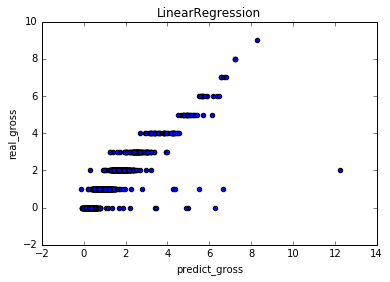

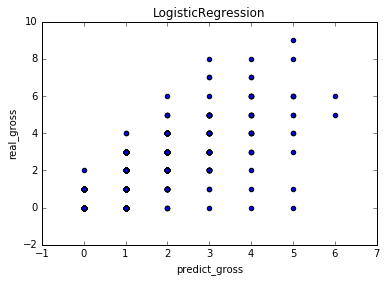

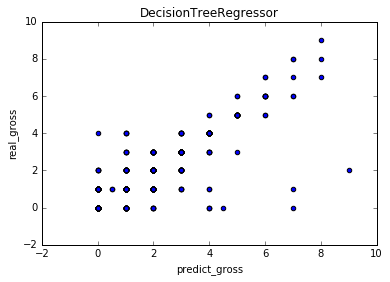

In [14]:
def drawPlot(y1, y2, title):
	plt.scatter(y1, y2)
	plt.xlabel('predict_gross')
	plt.ylabel('real_gross')
	plt.title(title)
	plt.show()
    
# plt.figure(1)
# drawPlot(y_svr1, y_test, 'svr rbf')
# plt.figure(2)
# drawPlot(y_svr2, y_test, 'svr linear')
# plt.figure(3)
# drawPlot(y_svr3, y_test, 'svr sigmoid')
plt.figure(4)
drawPlot(y_linReg, y_test, 'LinearRegression')
plt.figure(5)
drawPlot(y_linLog, y_test, 'LogisticRegression')
plt.figure(6)
drawPlot(y_tree, y_test, 'DecisionTreeRegressor')

In [15]:
LinearRegressor = m.fit(X_train, y_train)
tree = p.fit(X_train, y_train)
# d = dict(zip(list(X_train.columns), list(LinearRegressor.coef_)))
d = dict(zip(list(X_train.columns), list(tree.feature_importances_)))
s = sorted(d.items(),  key=operator.itemgetter(1))
s.reverse()
pickle.dump( tree, open( "decision_tree.pkl", "wb" ) )
s

[('budget', 0.88147872576344921),
 ('num_voted_users', 0.028665829799638571),
 ('imdb_score', 0.0089381267631408329),
 ('topic7', 0.0074233715817358945),
 ('movie_facebook_likes', 0.0058382985408264015),
 ('cast_total_facebook_likes', 0.0055156405506732696),
 ('duration', 0.0043892612480971593),
 ('actor_3_facebook_likes', 0.0039612597408392328),
 ('num_critic_for_reviews', 0.0035857076860517597),
 ('topic1', 0.003527346128096057),
 ('num_user_for_reviews', 0.0033903051269470702),
 ('topic15', 0.003354331383724405),
 ('topic5', 0.003253173061361071),
 ('actor_1_facebook_likes', 0.003191841237077117),
 ('topic0', 0.0020777895044625681),
 ('topic17', 0.0020642239071821957),
 ('topic10', 0.0017584448711225953),
 ('topic24', 0.0017279767614202543),
 ('topic26', 0.0017075476970101764),
 ('topic11', 0.0016899171318590785),
 ('topic19', 0.001470970612000078),
 ('topic3', 0.0012435130348708173),
 ('Crime', 0.0011168432186689215),
 ('director_facebook_likes', 0.0010999053518630417),
 ('actor_2_

### test on Random Forest

In [20]:
RF = RandomForestClassifier(min_samples_split=5, )
avg = 0
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=.3, random_state=123)
    RF.fit(X_train, y_train)
    y_RF = RF.predict(X_test)
    r2_score_RF = r2_score(y_test, y_RF)
    avg += r2_score_RF

avg /= 100
print('r2_score of Random Forest', avg)
# def drawPlot(y1, y2, title):
# 	plt.scatter(y1, y2)
# 	plt.xlabel('predict_gross')
# 	plt.ylabel('real_gross')
# 	plt.title(title)
# 	plt.show()
    
# plt.figure(1)
# drawPlot(y_RF, y_test, 'RF')

r2_score of Random Forest 0.650498356828


In [17]:
test = newMovie.loc[0, 'num_critic_for_reviews':'Documentary']
tree.predict(test)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 9.])